## Statistical Analysis for TSB-AD

### TSB-AD-U

In [ ]:
import pandas as pd
df_VUS_PR = pd.read_csv('benchmark_eval_results/uni_mergedTable_VUS-PR.csv')
Comparaed_Solution_Pool = ['Sub-IForest', 'IForest', 'Sub-LOF', 'LOF', 'POLY', 'MatrixProfile', 'KShapeAD', 'SAND', 'Series2Graph', 'SR', 'Sub-PCA', 'Sub-HBOS', 'Sub-OCSVM', 
            'Sub-MCD', 'Sub-KNN', 'KMeansAD', 'AutoEncoder', 'CNN', 'LSTMAD', 'TranAD', 'AnomalyTransformer', 'OmniAnomaly', 'USAD', 'Donut', 
            'TimesNet', 'FITS', 'OFA', 'Lag-Llama', 'Chronos', 'TimesFM', 'MOMENT (ZS)', 'MOMENT (FT)']

mean_df = pd.DataFrame()
mean_df['VUS_PR_Rank'] = df_VUS_PR[Comparaed_Solution_Pool].mean().rank(ascending=False)
sorted_mean_df = mean_df.sort_values(by='VUS_PR_Rank', ascending=True)
sorted_mean_df

,VUS_PR_Rank
Sub-PCA,1.0
KShapeAD,2.0
POLY,3.0
Series2Graph,4.0
MOMENT (FT),5.0
MOMENT (ZS),6.0
KMeansAD,7.0
USAD,8.0
Sub-KNN,9.0
MatrixProfile,10.0


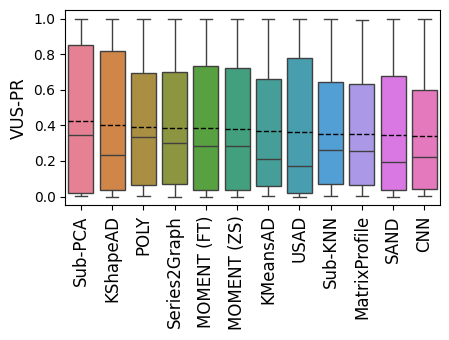

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rank_list = sorted_mean_df.index[:12]

df_acc = df_VUS_PR
plt.figure(figsize=(4.6, 3.5))
sns.reset_orig()
ax = sns.boxplot(data=df_acc[rank_list], showfliers=False, 
                 meanprops=dict(color='k', linestyle='--'), showmeans=True, meanline=True)
plt.xticks(ticks=range(len(rank_list)), labels=rank_list, rotation=90, fontsize=12)
plt.ylabel('VUS-PR', fontsize=12)
plt.tight_layout()
plt.show()

### TSB-AD-M

In [9]:
import pandas as pd
df_VUS_PR = pd.read_csv('benchmark_eval_results/multi_mergedTable_VUS-PR.csv')
Comparaed_Solution_Pool = ['IForest', 'LOF', 'PCA', 'HBOS', 'OCSVM', 'MCD', 'KNN', 'KMeansAD', 'COPOD', 'CBLOF', 'EIF', 'RobustPCA', 'AutoEncoder', 
                    'CNN', 'LSTMAD', 'TranAD', 'AnomalyTransformer', 'OmniAnomaly', 'USAD', 'Donut', 'TimesNet', 'FITS', 'OFA']

mean_df = pd.DataFrame()
mean_df['VUS_PR_Rank'] = df_VUS_PR[Comparaed_Solution_Pool].mean().rank(ascending=False)
sorted_mean_df = mean_df.sort_values(by='VUS_PR_Rank', ascending=True)
sorted_mean_df

,VUS_PR_Rank
CNN,1.0
OmniAnomaly,2.0
PCA,3.0
LSTMAD,4.0
USAD,5.0
AutoEncoder,6.0
KMeansAD,7.0
CBLOF,8.0
MCD,9.0
OCSVM,10.0


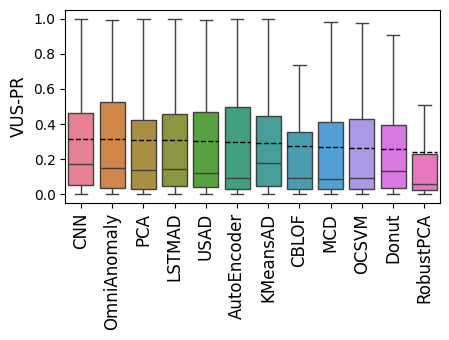

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

rank_list = sorted_mean_df.index[:12]

df_acc = df_VUS_PR
plt.figure(figsize=(4.6, 3.5))
sns.reset_orig()
ax = sns.boxplot(data=df_acc[rank_list], showfliers=False, 
                 meanprops=dict(color='k', linestyle='--'), showmeans=True, meanline=True)
plt.xticks(ticks=range(len(rank_list)), labels=rank_list, rotation=90, fontsize=12)
plt.ylabel('VUS-PR', fontsize=12)
plt.tight_layout()
plt.show()